# Ilustrative examples

## Figure 4 - A decision tree estimation from training sample; the corresponding decision tree is also shown. Note root, decision and leaf nodes (predictions), with splitting locations (leaf). 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig libann0 libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgts-0.7-5 libgts-bin libgvc6 libgvpr2 libjbig0 liblab-gamut1 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  fontconfig graphviz libann0 libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgts-0.7-5 libgts-bin libgvc6 libgvpr2 libjbig0 liblab-gamut1 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
0 upgraded, 30 newly installed, 0 to remove and 8 not upgraded.
Need to get 4,154 kB of

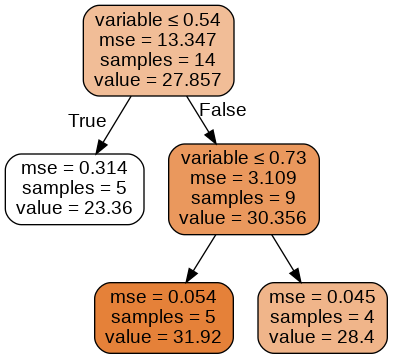

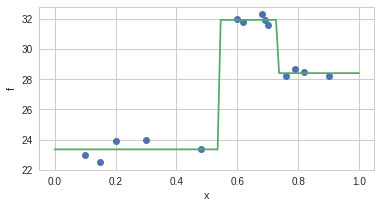

In [1]:
# Requires Graphviz (https://www.graphviz.org/) for tree visualization
!apt-get install graphviz -y
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')

# The data
X_train = [ 0.1, 0.15, 0.2, 0.3, 0.48, 0.6, 0.62, 0.68, 0.69, 0.7, 0.76, 0.79, 0.82, 0.9]
Y_train = [ 23,  22.5, 23.9, 24, 23.4, 32, 31.8, 32.3, 31.9, 31.6, 28.2, 28.7, 28.5, 28.2]
data = pd.DataFrame({'x':X_train, 'y':Y_train})

# Sample visualization
f, ax = plt.subplots(figsize=(6, 3))
plt.plot(X_train, Y_train, 'o')

# Decision Tree training
arbol_gini = DecisionTreeRegressor(max_depth=4, random_state = 100, min_samples_leaf=3)
arbol_gini.fit(np.array(X_train).reshape(-1,1), Y_train)

# Decision Tree predictions
X_test = np.linspace(0, 1, 100)
Y_test = arbol_gini.predict(np.array(X_test).reshape(-1, 1))

# Predictions visualization
plt.plot(X_test, Y_test)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f')

# Decision Tree visualization
from sklearn.tree import export_graphviz
from subprocess import check_call
from IPython.display import Image as PImage

with open("tree1.dot", 'w') as f:
    export_graphviz(arbol_gini, out_file=f,  
                filled=True, rounded=True,
                special_characters=True,
                impurity = True,
                feature_names = list(['variable']))
# Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])
PImage("tree1.png")

## Figure 5 - Decision tree estimation obtained when modeling Branin and Hoo test function -2D- with a training sample size of twenty and a maximum depth of three. The resulting decision tree is also shown.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


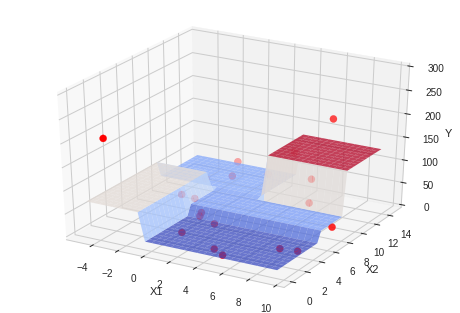

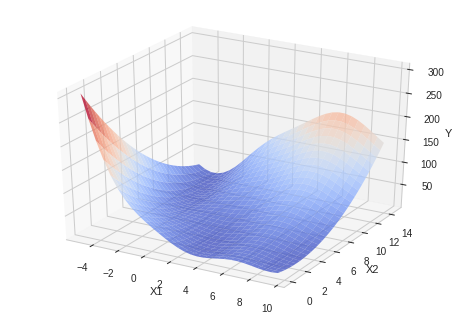

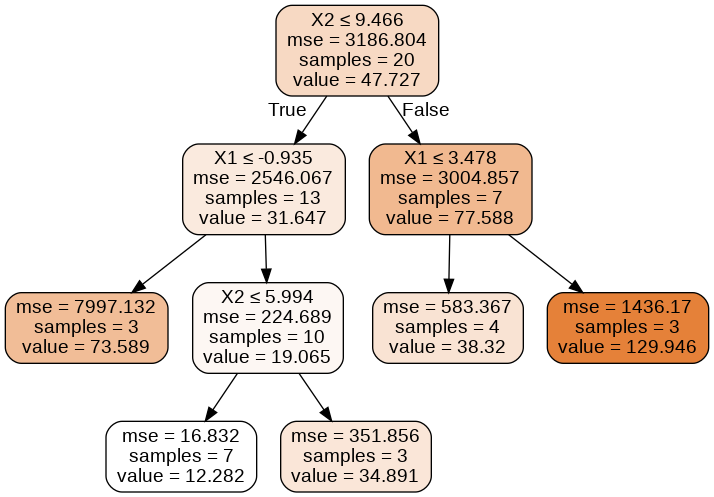

In [2]:
!apt-get install graphviz -y
!pip install -q pydoe
from pyDOE import lhs
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

np.random.seed(4)

# Generating a sample dataset - Using analytical function Branin & Hoo 
BH = lambda X: (X[:,1] - 5.1/4*(X[:,0]/np.pi)**2 + 5*X[:,0]/np.pi - 6)**2 + 10*(1-np.pi/8)*np.cos(X[:,0])+10
X_train = (15*lhs(2,samples=20)) - [5, 0] # Latin hypercube
Y_train = BH(X_train)

# Decision Tree training
arbol_gini = DecisionTreeRegressor(max_depth=3, random_state = 100, min_samples_leaf=3)
arbol_gini.fit(X_train, Y_train)

# Regular grid covering the domain of the data
X1,X2 = np.meshgrid(np.arange(-5.0, 10.0, 0.5), np.arange(0.0, 15.0, 0.5))
XX1 = X1.flatten()
XX2 = X2.flatten()

# Decision Tree prediction
YY  = arbol_gini.predict(np.c_[XX1, XX2])
Y = YY.reshape(X1.shape)

# Plotting points and predicted surface
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm, alpha=0.75) #rstride=1, cstride=1, 
ax.scatter(X_train[:,0], X_train[:,1], Y_train, c='r', s=50)
plt.xlabel('X1')
plt.ylabel('X2')
ax.set_zlabel('Y')
ax.axis('equal')
ax.axis('tight')
ax.set_zlim(0,300)
plt.show()

# Real function estimation
YY_real = BH(np.c_[XX1, XX2])
Y_real = YY_real.reshape(X1.shape)

# Plotting real function
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y_real, cmap=cm.coolwarm, alpha=0.75) #rstride=1, cstride=1, 
plt.xlabel('X1')
plt.ylabel('X2')
ax.set_zlabel('Y')
ax.axis('equal')
ax.axis('tight')
plt.show()

# Decision Tree visualization
from sklearn.tree import export_graphviz
from subprocess import check_call
from IPython.display import Image as PImage

with open("tree_bh.dot", 'w') as f:
    export_graphviz(arbol_gini, out_file=f,  
                filled=True, rounded=True,
                special_characters=True,
                impurity = True,
                feature_names = list(['X1','X2']))
# Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree_bh.dot','-o','tree_bh.png'])
PImage("tree_bh.png")

## Figure 7 - Two-feature representations of the selected analytical test functions

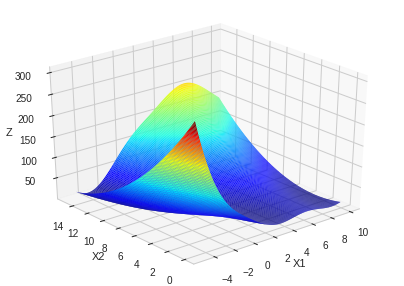

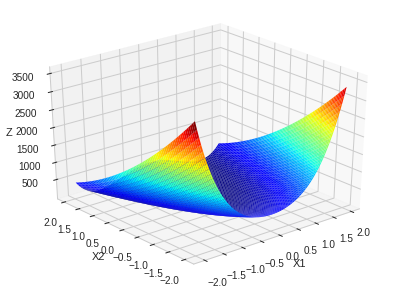

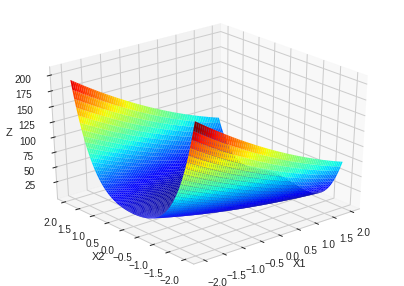

In [4]:
import seaborn as sns
sns.set_style("whitegrid")

# Plotting Branin & Hoo in its domain
fig = plt.figure(figsize=(7, 5))
ax = fig.gca(projection='3d')
x = np.arange(-5.0, 10.0, 0.1)
y = np.arange(0.0, 15.0, 0.1)
X, Y = np.meshgrid(x, y)
BH = lambda X: (X[:,1] - 5.1/4*(X[:,0]/np.pi)**2 + 5*X[:,0]/np.pi - 6)**2 + 10*(1-np.pi/8)*np.cos(X[:,0])+10
zs = np.array([BH(np.array([[x, y]])) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
plt.xlabel('X1')
plt.ylabel('X2')
ax.set_zlabel('Z')
ax.view_init(30, -130)
ax.axis('equal')
ax.axis('tight')
plt.show()

# Plotting Rosenbrock in a 2D domain
fig = plt.figure(figsize=(7, 5))
ax = fig.gca(projection='3d')
x = np.arange(-2.0, 2.0, 0.05)
y = np.arange(-2.0, 2.0, 0.05)
X, Y = np.meshgrid(x, y)
R2 = lambda X: 100*(X[:,0]**2 - X[:,1])**2 + (X[:,0] - 1)**2
zs = np.array([R2(np.array([[x, y]])) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
plt.xlabel('X1')
plt.ylabel('X2')
ax.set_zlabel('Z')
ax.view_init(30, -130)
ax.axis('equal')
ax.axis('tight')
plt.show()

# Plotting Dixon in a 2D domain
fig = plt.figure(figsize=(7, 5))
ax = fig.gca(projection='3d')
x = np.arange(-2.0, 2.0, 0.05)
y = np.arange(-2.0, 2.0, 0.05)
X, Y = np.meshgrid(x, y)
DF = lambda X: (X[:,0] - 1)**2 + 2*(2*X[:,1]**2 - X[:,0])**2
zs = np.array([DF(np.array([[x, y]])) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
plt.xlabel('X1')
plt.ylabel('X2')
ax.set_zlabel('Z')
ax.view_init(30, -130)
ax.axis('equal')
ax.axis('tight')
plt.show()

